# SVM

In this lab we will use support vector machines to classify handwriting samples

In [1]:
%matplotlib inline
import sklearn.linear_model
import numpy
import matplotlib.pyplot
import sklearn.svm
import sklearn.datasets
import sklearn.cross_validation

In [2]:
# Load the images sample data set
digits = sklearn.datasets.load_digits()

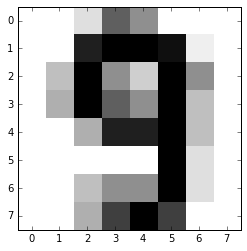

In [3]:
# You can display some sample images from the data set like this:
matplotlib.pyplot.imshow(digits.images[-2], cmap=matplotlib.pyplot.cm.gray_r, interpolation='nearest')

In [4]:
# The data is just an array of grayscale depths from a low-quality scanner
digits.data[-2]

array([  0.,   0.,   2.,  10.,   7.,   0.,   0.,   0.,   0.,   0.,  14.,
        16.,  16.,  15.,   1.,   0.,   0.,   4.,  16.,   7.,   3.,  16.,
         7.,   0.,   0.,   5.,  16.,  10.,   7.,  16.,   4.,   0.,   0.,
         0.,   5.,  14.,  14.,  16.,   4.,   0.,   0.,   0.,   0.,   0.,
         0.,  16.,   2.,   0.,   0.,   0.,   4.,   7.,   7.,  16.,   2.,
         0.,   0.,   0.,   5.,  12.,  16.,  12.,   0.,   0.])

In [5]:
# You can see what this number is supposed to be by looking at the target array.
digits.target[-2]

9

In [6]:
# Create an SVC classifier using all the default parameters
svc = sklearn.svm.SVC()

In [10]:
# Fit it to digits.data with a target of digits.target
import pandas
df = pandas.DataFrame(digits.data)

In [21]:
svc.fit(df, digits.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
# Predict a few values, and see how it goes
predictions = svc.predict(df)
sklearn.metrics.accuracy_score(predictions, digits.target)

1.0

In [26]:
# If you use sklearn.cross_validation.cross_val_score, how well does it perform?
# You will want to use the parameter scoring='accuracy'
score = sklearn.cross_validation.cross_val_score(svc, df, digits.target, scoring='accuracy', cv =5).mean()

In [27]:
score

0.44878680061604637

In [31]:
# Try using GridSearchCV with a variety of different values for C:
#  - kernels (rbf, poly, linear)
#  - degrees (only relevant for poly, but 1,2,3)
#  - gammas (try a range from 0.001 up to 1)
#  - C (try a few values above and below 1)

params = {
    'kernel': ['rbf', 'poly'],
    'degree': [2,3,4],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 0.3, 1.0],
    'C': [0.5,1.0,1.5]
}

import sklearn.grid_search
searcher = sklearn.grid_search.GridSearchCV(sklearn.svm.SVC(), param_grid=params)
searcher.fit(digits.data, digits.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.3, 1.0], 'C': [0.5, 1.0, 1.5], 'degree': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [32]:
searcher.best_estimator_

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
searcher.best_score_

0.97551474680022254

In [34]:
searcher.best_params_

{'C': 1.5, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}